In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

# from sklearn.datasets import load_boston
# from sklearn.datasets import load_iris, load_breast_cancer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# 
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.ensemble import RandomForestClassifier


# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV



In [38]:
def heat_map(num_df):
    corr = num_df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(9, 7))
        ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [105]:
data_ = pd.read_csv("./data/cleaned_data.csv")

In [106]:
data_.columns
# data_.head()


Index(['ujahr', 'umonat', 'weekday', 'uwochentag', 'long', 'lat',
       'time_of_day', 'ustunde', 'light_condition', 'ulichtverh',
       'street_condition', 'ustrzustand', 'uart', 'utyp1', 'ist_rad',
       'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige',
       'ukategorie', 'accident_outcome'],
      dtype='object')

In [107]:
data_["death"] = list(map(lambda x: 1 if x == "killed" else 0, data_.accident_outcome))

In [108]:
X = data_.drop(columns=["death", "accident_outcome", "ukategorie", "weekday", "time_of_day", "light_condition", "street_condition"], axis = 1)
y = data_["death"]

y.value_counts()
y


0        0
1        0
2        0
3        0
4        0
        ..
38846    0
38847    0
38848    0
38849    0
38850    0
Name: death, Length: 38851, dtype: int64

In [109]:
# upsampling

In [110]:
smote = SMOTE()

In [111]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    38731
1    38731
Name: death, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

Tree plot


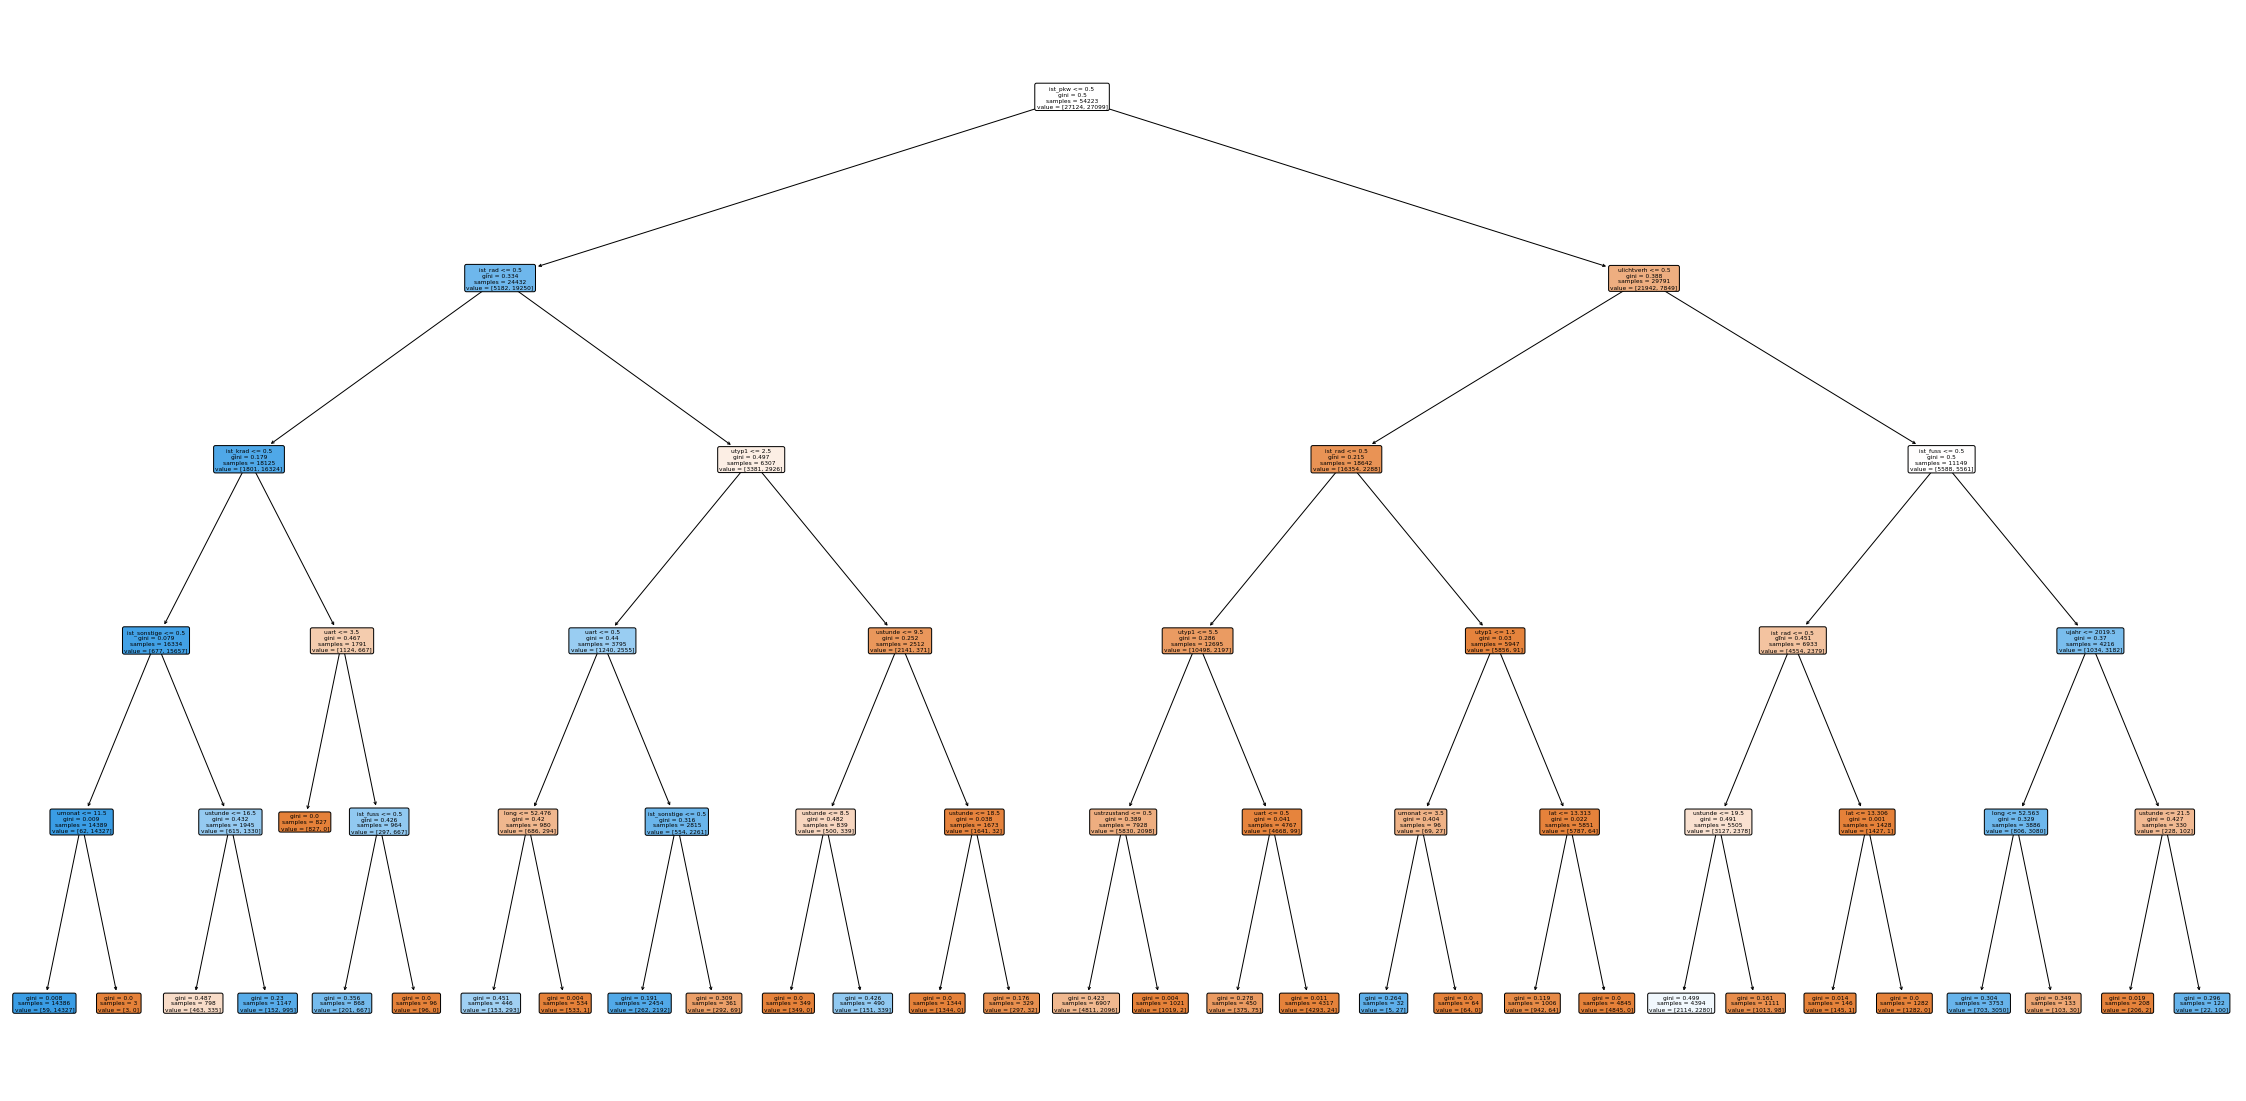

In [113]:
compare_performance_df = pd.DataFrame()

for depth in range(5,6):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

In [114]:
compare_performance_df

,depth,error_metric,train,test
0,5,Accuracy,0.877340,0.876716
1,5,Precision,0.863947,0.861705
2,5,Recall,0.895605,0.897782


,Error_metric,Train,Test
0,Accuracy,0.834904,0.837471
1,Precision,0.841893,0.845153
2,Recall,0.824495,0.826771


Confusion matrix for the train set
[[22928  4196]
 [ 4756 22343]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


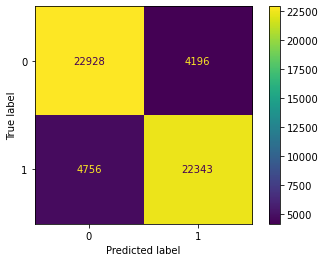



Confusion matrix for the test set
[[9845 1762]
 [2015 9617]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


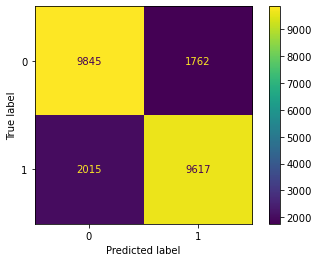

In [115]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [117]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
11,ist_pkw,-1.973685,1.973685
10,ist_rad,-1.472502,1.472502
15,ist_sonstige,-0.830825,0.830825
13,ist_krad,-0.715130,0.715130
6,ulichtverh,0.666113,0.666113
7,ustrzustand,-0.612948,0.612948
8,uart,0.522879,0.522879
9,utyp1,-0.328606,0.328606
2,uwochentag,-0.208971,0.208971
4,lat,-0.129584,0.129584


## Different approach to avoid overextensive upscaling

Group the injuries into not_severe and severe (= outcome is seriuosly injured or death)

In [64]:
data_["not_severe"] = list(map(lambda x: 1 if x == "slightly_injured" else 0, data_.accident_outcome))

In [95]:
data_.not_severe.value_counts()

1    32831
0     6020
Name: not_severe, dtype: int64

In [96]:
X = data_.drop(columns=['ujahr', 'long', 'lat', 'time_of_day', 'light_condition', 'weekday', 'street_condition', 
                        "accident_outcome", "ukategorie", "not_severe"], axis = 1)
y = data_["not_severe"]


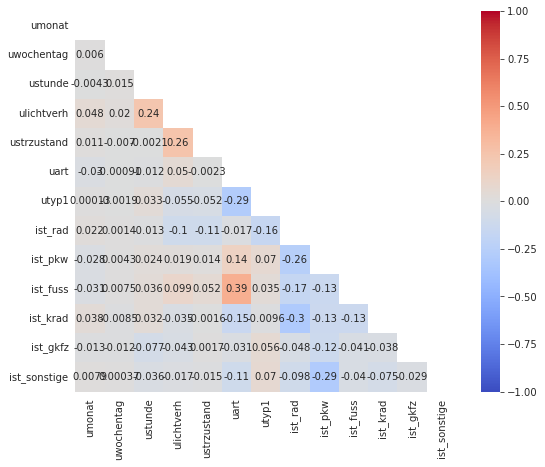

In [97]:
heat_map(X)

### Upsampling using smote

In [98]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    32831
0    32831
Name: not_severe, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

#### Decision Tree

In [100]:
compare_performance_df = pd.DataFrame()

for depth in range(2,9):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)


In [101]:
compare_performance_df.sort_values(["error_metric", "test"])

,depth,error_metric,train,test
0,2,Accuracy,0.605269,0.604955
0,3,Accuracy,0.622871,0.620793
0,4,Accuracy,0.652133,0.645617
0,5,Accuracy,0.664230,0.658511
0,6,Accuracy,0.674042,0.666988
0,7,Accuracy,0.689946,0.678055
0,8,Accuracy,0.701934,0.685974
1,2,Precision,0.581476,0.578819
1,3,Precision,0.588588,0.584845
1,4,Precision,0.647643,0.638908


Tree plot


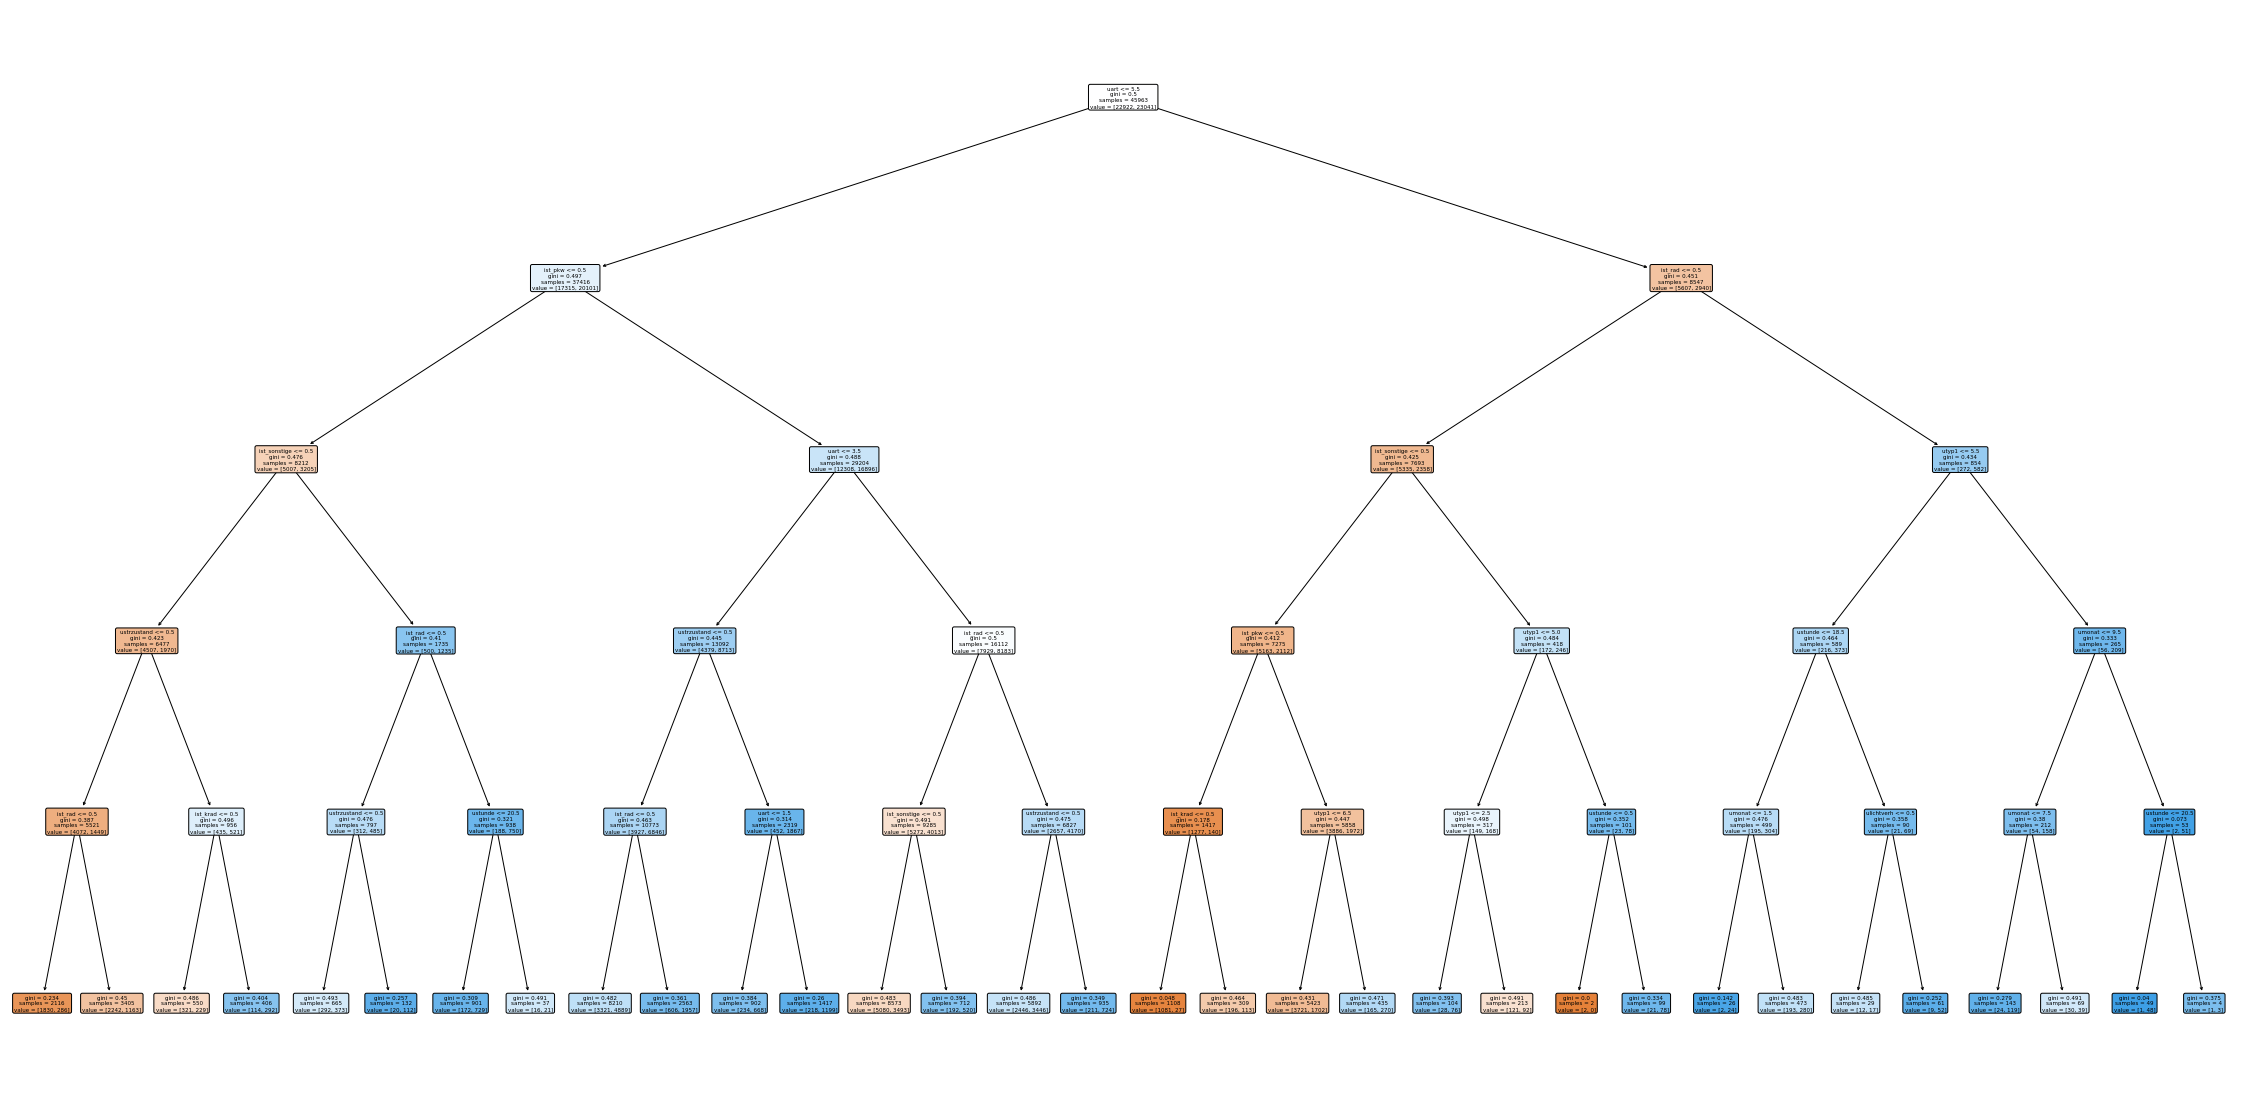

In [102]:
# depth of 5 seems to be a good average
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({"depth" : depth,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=1),
                                         recall_score(y_train, y_pred_train_dt, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=1),
                                        recall_score(y_test, y_pred_test_dt, pos_label=1)]})

compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)
print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.649718,0.647546
1,Precision,0.654292,0.649104
2,Recall,0.638731,0.632993


Confusion matrix for the train set
[[15146  7776]
 [ 8324 14717]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


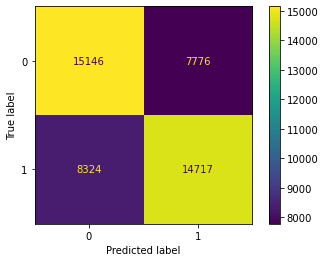



Confusion matrix for the test set
[[6559 3350]
 [3593 6197]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


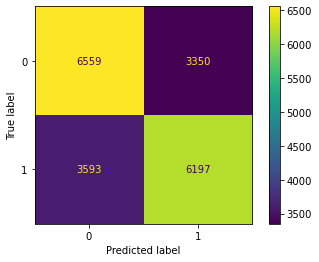

In [103]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [104]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
8,ist_pkw,0.574779,0.574779
7,ist_rad,0.555114,0.555114
12,ist_sonstige,0.477982,0.477982
4,ustrzustand,0.318433,0.318433
10,ist_krad,0.227158,0.227158
6,utyp1,0.213403,0.213403
5,uart,-0.198148,0.198148
11,ist_gkfz,0.171284,0.171284
0,umonat,0.097739,0.097739
1,uwochentag,0.096243,0.096243


### Downsampling

In [74]:
cat_not = data_[data_.not_severe == 1]
cat_sev  = data_[data_.not_severe == 0]
print(f"""Not severe: {len(cat_not)} ({round(len(cat_not)*100/len(data_), 2)} %)
Severe    : {len(cat_sev):5d} ({round(len(cat_sev)*100/len(data_), 2)} %)""")


Not severe: 32831 (84.5 %)
Severe    :  6020 (15.5 %)


In [75]:
cat_not_down = cat_not.sample(len(cat_sev))
len(cat_not_down) == len(cat_sev)

True

In [76]:
data_down = pd.concat([cat_sev, cat_not_down], axis=0)
data_down = data_down.sample(frac=1)
len(data_down) == len(cat_sev) * 2

True

In [77]:
X = data_down.drop(columns=['ujahr', 'long', 'lat', 'time_of_day', 'light_condition', 'weekday', 'street_condition', 
                        "accident_outcome", "ukategorie", "not_severe"], axis = 1)
y = data_down["not_severe"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [79]:
compare_performance_df = pd.DataFrame()

for depth in range(2,9):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

In [80]:
compare_performance_df.sort_values(["error_metric", "test"], ascending = (True, True))

,depth,error_metric,train,test
0,2,Accuracy,0.595396,0.586656
0,3,Accuracy,0.616754,0.592470
0,4,Accuracy,0.625059,0.603544
0,5,Accuracy,0.631111,0.603821
0,8,Accuracy,0.663503,0.605482
0,6,Accuracy,0.635619,0.606035
0,7,Accuracy,0.649146,0.606866
1,2,Precision,0.571942,0.564986
1,4,Precision,0.593717,0.575965
1,5,Precision,0.599927,0.577252


   depth error_metric     train      test
0      3     Accuracy  0.616754  0.592470
1      3    Precision  0.607409  0.583829
2      3       Recall  0.658195  0.650276 

---------------------------------------------------------------------------
Tree plot


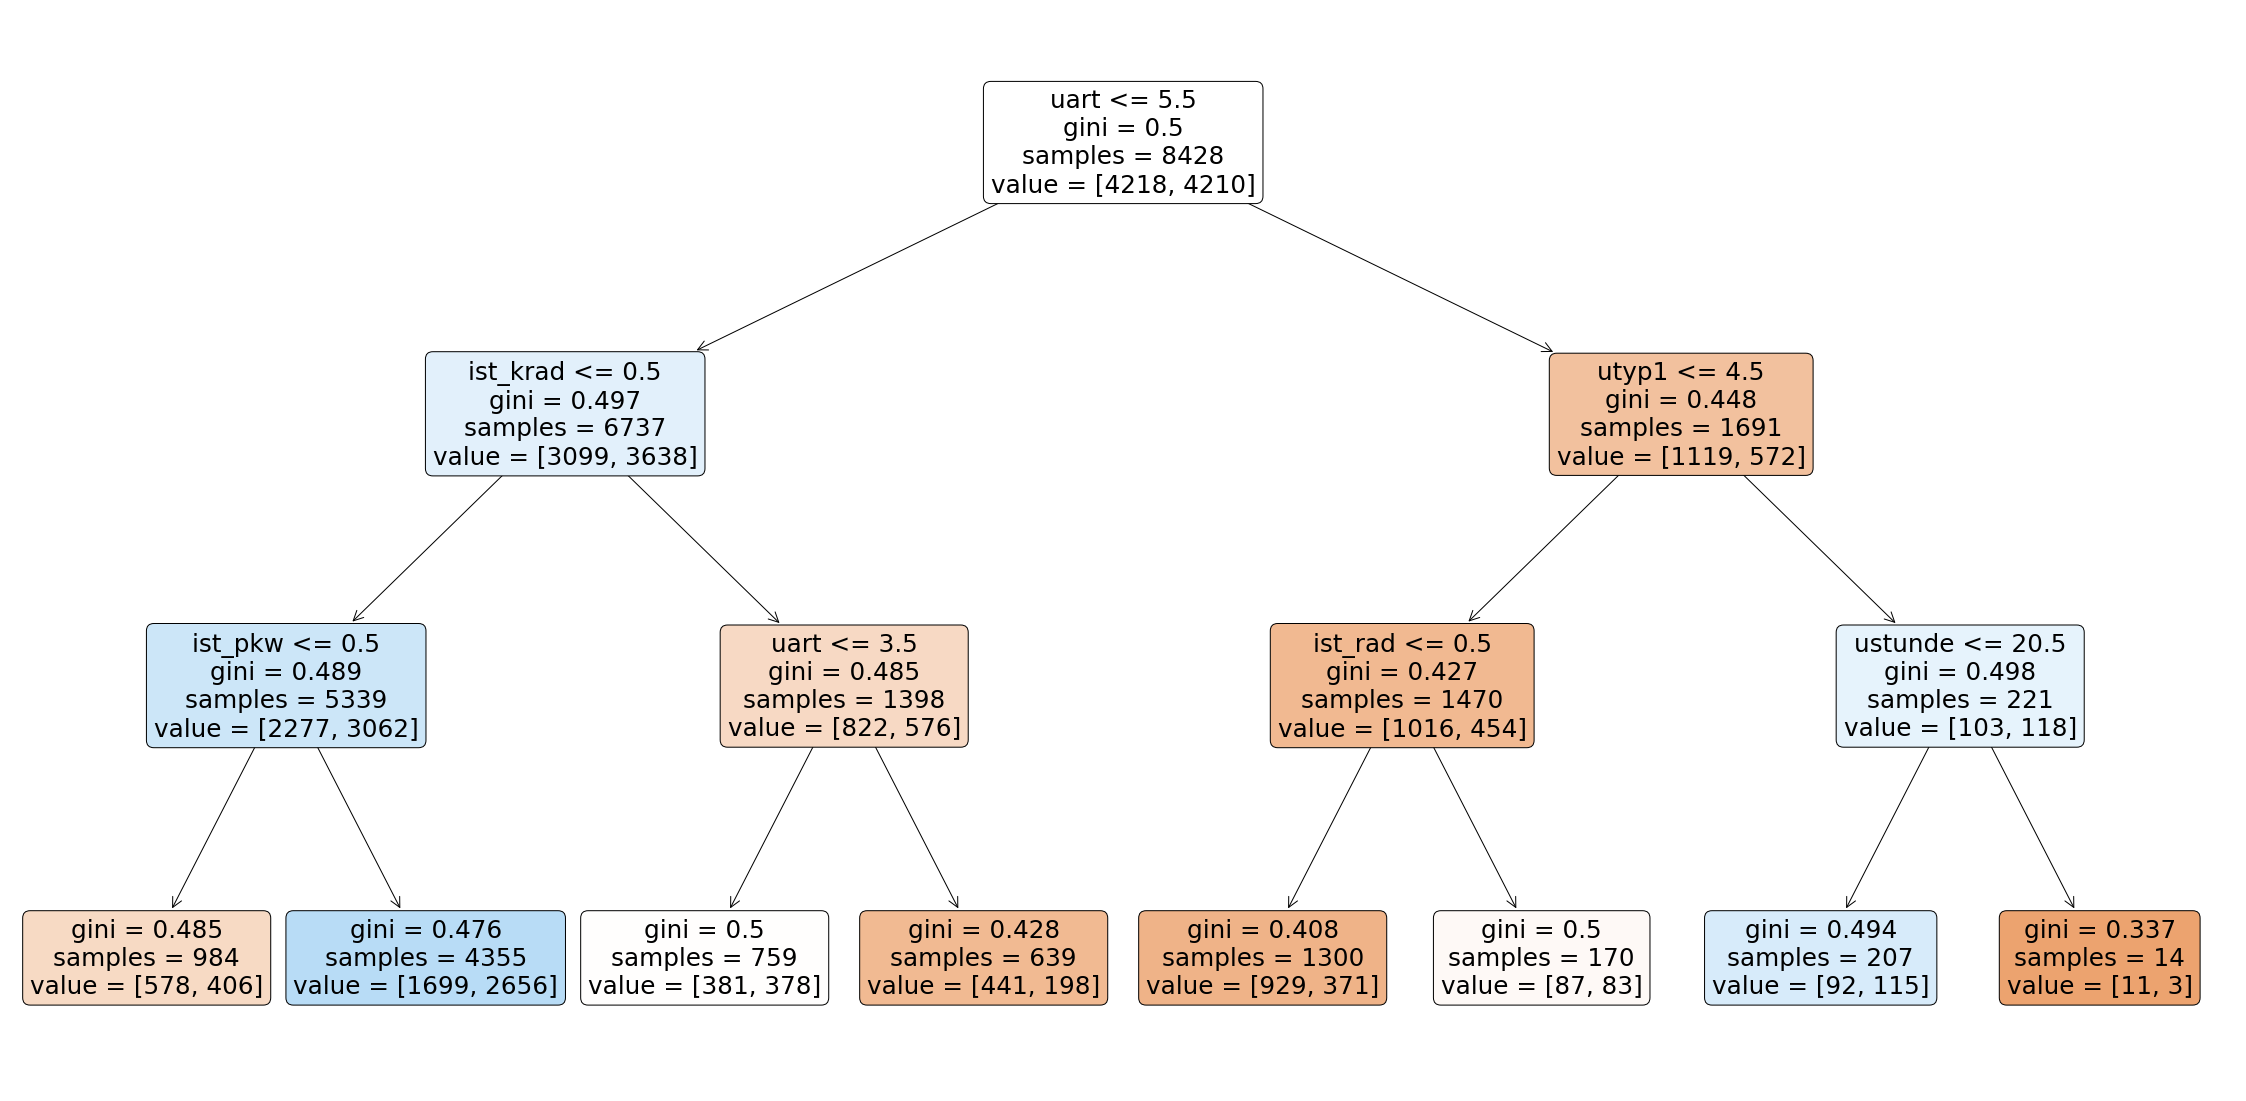

In [81]:
# depth of 7 seems to be a good average
depth = 3
dt = DecisionTreeClassifier(max_depth=depth)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({"depth" : depth,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=1),
                                         recall_score(y_train, y_pred_train_dt, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=1),
                                        recall_score(y_test, y_pred_test_dt, pos_label=1)]})

# compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)
print(performance_df, "\n\n---------------------------------------------------------------------------")
print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show()


,Error_metric,Train,Test
0,Accuracy,0.609516,0.578350
1,Precision,0.599052,0.570447
2,Recall,0.660095,0.641989


Confusion matrix for the train set
[[2358 1860]
 [1431 2779]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


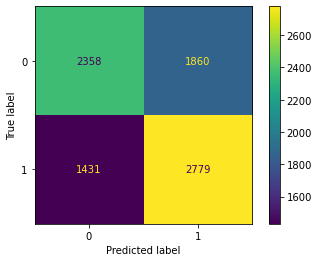



Confusion matrix for the test set
[[ 927  875]
 [ 648 1162]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


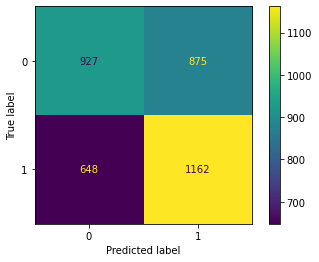

In [82]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [83]:
# print(log_model.coef_, log_model.intercept_)

[[ 0.01885014  0.00168324 -0.04674456 -0.10078596  0.01072663 -0.14159807
   0.1676512   0.01454135  0.14396705 -0.25983858 -0.25112811 -0.16224144
  -0.00534394]] [-0.00650952]


In [86]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

In [92]:
feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
9,ist_fuss,-0.259839,0.259839
10,ist_krad,-0.251128,0.251128
6,utyp1,0.167651,0.167651
11,ist_gkfz,-0.162241,0.162241
8,ist_pkw,0.143967,0.143967
5,uart,-0.141598,0.141598
3,ulichtverh,-0.100786,0.100786
2,ustunde,-0.046745,0.046745
0,umonat,0.018850,0.018850
7,ist_rad,0.014541,0.014541
